<a href="https://colab.research.google.com/github/Flaagrah/MachineLearning/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression Class

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)

class LinearRegression:

  def __init__(self, numTrials, numFeatures, numSamples, correlations):
    # Number of trials to perform when generating the beta estimates
    self._NUM_TRIALS = numTrials
    # Number of features in the Linear Regression
    self._NUM_FEATURES = numFeatures
    # Number of samples for each trial run
    self._NUM_SAMPLES = numSamples
    # Initialize beta estimates
    self.__setEmptyBetaEstimates(self)
    # Create a correlation matrix given the correlations between the features
    self.covarianceMatrix = self.__getCovariateMatrixWithCorrelation(self, self._NUM_FEATURES, correlations)

  @staticmethod
  def __getSquareIdentityMatrix(self, size):
    # Returns an identity matrix of the specified size
    covarianceMatrix = np.zeros([size,size])
    for i in range(0,size):
      covarianceMatrix[i][i] = 1
    return covarianceMatrix

  @staticmethod
  def __getCovariateMatrixWithCorrelation(self, size, correlations):
    # Create a correlation matrix given the correlations between the features
    covarianceMatrix = self.__getSquareIdentityMatrix(self, size)
    for r,c,correlation in correlations:
      covarianceMatrix[r][c] = correlation
      covarianceMatrix[c][r] = correlation
    return covarianceMatrix

  @staticmethod
  def __setEmptyBetaEstimates(self):
    self.betaEstimates =  np.empty([self._NUM_TRIALS,self._NUM_FEATURES+1])

  def getBetaEstimates(self, popBetas, lamb=0, sampleDataX = None):
    numTrials = self._NUM_TRIALS
    numSamples = self._NUM_SAMPLES
    self.__setEmptyBetaEstimates(self)
    for i in range(0, numTrials):
      # Generate sample data for the independant variable if it is not given
      if sampleDataX is None:
        sampleDataX = np.c_[
            np.ones(numSamples),
            np.random.multivariate_normal(np.zeros(self._NUM_FEATURES), self.covarianceMatrix, numSamples)
          ]
      sampleDataE = np.random.normal(0, 5, (numSamples, 1))
      sampleDataY = np.matmul(sampleDataX,popBetas)+sampleDataE
      # Using Least Squared Estimator to estimate the Betas (((X^T)*X)^-1)*(X^T)*Y
      xtransposex = np.matmul(np.transpose(sampleDataX), sampleDataX)
      xtransposex = xtransposex + lamb*np.eye(xtransposex.shape[0])
      xtransposexInverse = np.linalg.inv(xtransposex)
      xxmulttx = np.matmul(xtransposexInverse, np.transpose(sampleDataX))
      betaEst = np.matmul(xxmulttx, sampleDataY)
      # Add the beta estimates to the list of estimates
      for j in range(0, self._NUM_FEATURES+1):
        self.betaEstimates[i][j]=betaEst[j]
    return self.betaEstimates

Now we gather sample data for the x, y, and error values and use ((x'x)^-1)x'y to estimate the population parameters. We repeat that 10000 times to show that, on average, the estimates for beta0 and beta1 will be equal to the population betas. This proves that OLS is unbiased.

In [ ]:
#NUM_FEATURES = 2
NUM_FEATURES = 2
#NUM_TRIALS = 10000
NUM_TRIALS = 1000
#NUM_SAMPLES = 100
NUM_SAMPLES = 10

def generateParameters(numberOfFeatures):
  popBetas = np.random.rand(numberOfFeatures+1, 1)
  return popBetas

# Get a list of true population parameters given the number of features.
popBetas = generateParameters(NUM_FEATURES)
# Create a Linear Regression problem where the features are uncorrelated
LRWithNoCorrelation = LinearRegression(NUM_TRIALS, NUM_FEATURES, NUM_SAMPLES, [])
# Create a Linear Regression problem where the first and second features have a correlation of 0.9
LRWithCorrelation = LinearRegression(NUM_TRIALS, NUM_FEATURES, NUM_SAMPLES, [(0, 1, 0.9)])
# Create beta estimates for when there is a correlation and when there isn't a correlation
betaEstimatesNoCorrelation = LRWithNoCorrelation.getBetaEstimates(popBetas)
betaEstimatesWithCorrelation = LRWithCorrelation.getBetaEstimates(popBetas)
print(betaEstimatesNoCorrelation)



[[-0.33004747  0.31304157 -0.0406675 ]
 [-1.28193691  0.9368741  -0.86871078]
 [ 2.65483029  1.44897805  1.57706558]
 ...
 [ 0.28322053  1.03277882 -1.21938134]
 [ 0.38859619  1.22089324  1.38441748]
 [ 0.11113119  0.27097886 -2.75878769]]


<ipython-input-1-e303a7722b07>:61: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  self.betaEstimates[i][j]=betaEst[j]


In [ ]:
'''
OLS_MTR = LinearRegression(NUM_TRIALS, NUM_FEATURES, NUM_SAMPLES, [])
OLS_MTR_EST = OLS_MTR.getBetaEstimates(popBetas, lamb=0)
'''


'\nOLS_MTR = LinearRegression(NUM_TRIALS, NUM_FEATURES, NUM_SAMPLES, [])\nOLS_MTR_EST = OLS_MTR.getBetaEstimates(popBetas, lamb=0)\n'

In [ ]:
'''
Ridge_MTR = LinearRegression(NUM_TRIALS, NUM_FEATURES, NUM_SAMPLES, [])
Ridge_MTR_EST = OLS_MTR.getBetaEstimates(popBetas, lamb=10)
'''

'\nRidge_MTR = LinearRegression(NUM_TRIALS, NUM_FEATURES, NUM_SAMPLES, [])\nRidge_MTR_EST = OLS_MTR.getBetaEstimates(popBetas, lamb=10)\n'

In [ ]:
'''
print(np.var(Ridge_MTR_EST[:,0]), np.var(OLS_MTR_EST[:,0]), np.var(Ridge_MTR_EST[:,0])/np.var(OLS_MTR_EST[:,0]))
print(np.var(Ridge_MTR_EST[:,1]), np.var(OLS_MTR_EST[:,1]), np.var(Ridge_MTR_EST[:,1])/np.var(OLS_MTR_EST[:,1]))
print(np.var(Ridge_MTR_EST[:,2]), np.var(OLS_MTR_EST[:,2]), np.var(Ridge_MTR_EST[:,2])/np.var(OLS_MTR_EST[:,2]))
'''

'\nprint(np.var(Ridge_MTR_EST[:,0]), np.var(OLS_MTR_EST[:,0]), np.var(Ridge_MTR_EST[:,0])/np.var(OLS_MTR_EST[:,0]))\nprint(np.var(Ridge_MTR_EST[:,1]), np.var(OLS_MTR_EST[:,1]), np.var(Ridge_MTR_EST[:,1])/np.var(OLS_MTR_EST[:,1]))\nprint(np.var(Ridge_MTR_EST[:,2]), np.var(OLS_MTR_EST[:,2]), np.var(Ridge_MTR_EST[:,2])/np.var(OLS_MTR_EST[:,2]))\n'

In [ ]:
'''
plt.hist(OLS_MTR_EST[:,1], label='OLS')
plt.hist(Ridge_MTR_EST[:,1], label='Ridge')
plt.axvline(popBetas[1], color='black', label='Actual Value')
plt.legend()
'''

"\nplt.hist(OLS_MTR_EST[:,1], label='OLS')\nplt.hist(Ridge_MTR_EST[:,1], label='Ridge')\nplt.axvline(popBetas[1], color='black', label='Actual Value')\nplt.legend()\n"

The graphs below show that there is more variation in the estimates for beta1 and beta2 when there is a correlation between the features.
However, the average of the estimates remain approximately equal to the population betas regardless of the correlation.

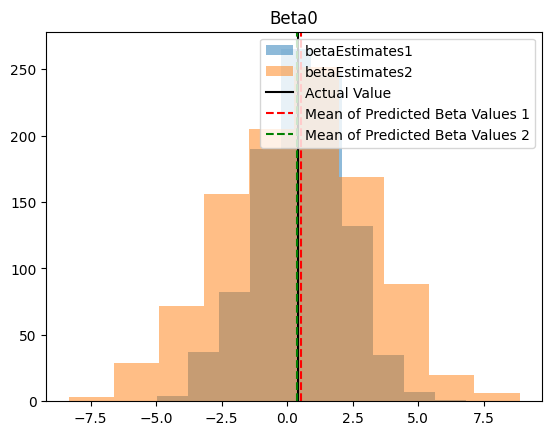

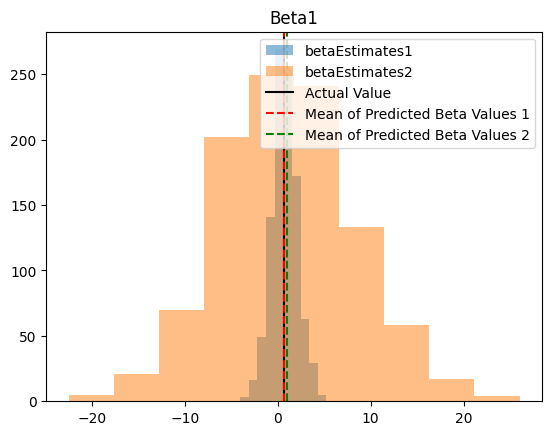

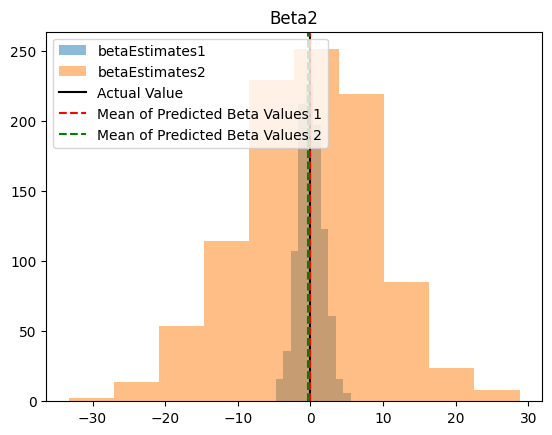

In [ ]:
def graphBetaEstimates(popBetas, betaEstimates1, betaEstimates2):
  numCoefficients = len(popBetas)
  for i in range(0, numCoefficients):
    plt.hist(betaEstimates1[:,i], alpha=0.5, label='betaEstimates1')
    plt.hist(betaEstimates2[:,i], alpha=0.5, label='betaEstimates2')
    plt.axvline(popBetas[i], color='black', label='Actual Value')
    plt.axvline(np.mean(betaEstimates1[:,i]), color='red', label='Mean of Predicted Beta Values 1', ls='--')
    plt.axvline(np.mean(betaEstimates2[:,i]), color='green', label='Mean of Predicted Beta Values 2', ls='--')
    plt.legend()
    plt.title('Beta'+str(i))

    plt.show()

graphBetaEstimates(popBetas, betaEstimatesNoCorrelation, betaEstimatesWithCorrelation)

There is more variation in the beta estimates when there is a correlation between the features because the collinearity of the features makes it difficult to distinguish the effect that each of the features is having on the predicted y.

In [ ]:
def printSpreads(numCoefficients, betaEstimates):
  for i in range(0, numCoefficients):
    print("Variation of beta"+str(i)+":")
    print(np.var(betaEstimates[:,i], ddof=0))

print('WITH NO CORRELATION')
printSpreads(NUM_FEATURES+1, betaEstimatesNoCorrelation)
print('\nWITH CORRELATION')
printSpreads(NUM_FEATURES+1, betaEstimatesWithCorrelation)


WITH NO CORRELATION
Variation of beta0:
2.9033625696560783
Variation of beta1:
1.8564217919108856
Variation of beta2:
2.939700265569277

WITH CORRELATION
Variation of beta0:
7.382368233800412
Variation of beta1:
52.66781833449304
Variation of beta2:
87.06215994815177


Now let's analyze the impact of Ridge Regression. The formula for calculating LSE with ridge is ((x'x + λI)^-1)x'y. As such, we pass in a λ value to the getBetaEstimates function. As you can see, ridge regression reduces the variation at the cost of introducing some bias into the estimates. The estimated mean of the beta's is further away from the actual population betas than for the non-ridge beta estimates.

<ipython-input-1-e303a7722b07>:61: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  self.betaEstimates[i][j]=betaEst[j]


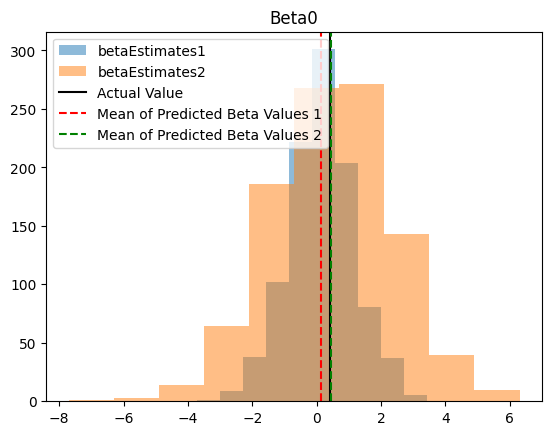

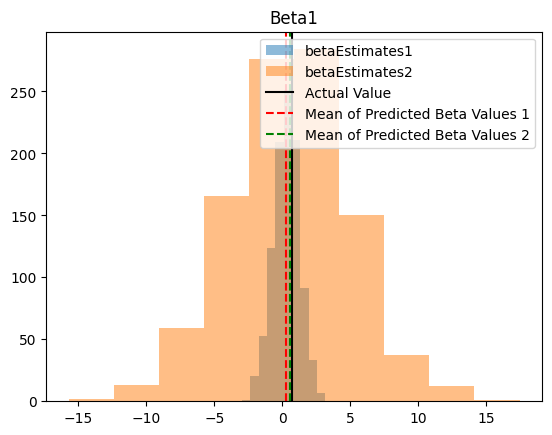

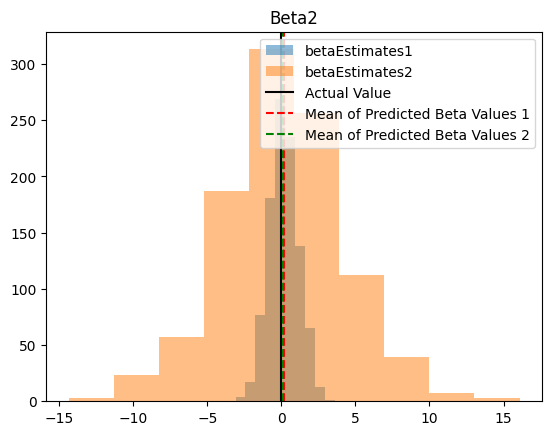

WITH RIDGE
Variation of beta0:
1.0257072791856117
Variation of beta1:
0.8932266025386073
Variation of beta2:
0.9384948318455728
WITHOUT RIDGE
Variation of beta0:
3.5275126718804826
Variation of beta1:
18.680117372620312
Variation of beta2:
16.690640750164356


In [ ]:

betaEstimatesWithRidge = LRWithCorrelation.getBetaEstimates(popBetas, 5)
betaEstimatesWithoutRidge = LRWithCorrelation.getBetaEstimates(popBetas, 0)
graphBetaEstimates(popBetas, betaEstimatesWithRidge, betaEstimatesWithoutRidge)
print('WITH RIDGE')
printSpreads(NUM_FEATURES+1, betaEstimatesWithRidge)
print('WITHOUT RIDGE')
printSpreads(NUM_FEATURES+1, betaEstimatesWithoutRidge)


In [ ]:
popBetas = generateParameters(NUM_FEATURES)
sampleDataX = np.c_[
            np.ones(NUM_SAMPLES),
            np.random.multivariate_normal(np.zeros(NUM_FEATURES), np.eye(NUM_FEATURES), NUM_SAMPLES)
          ]
#std = 0.2
std = 1
sampleDataE = np.random.normal(0, std, NUM_SAMPLES)
print(sampleDataX)
print(popBetas)

[[ 1.          0.33066176  0.08058777]
 [ 1.          0.95690045  0.56991635]
 [ 1.         -0.43518831 -1.09220707]
 [ 1.          0.35065078  0.06440647]
 [ 1.          0.81061036 -0.18117211]
 [ 1.         -1.40378646  0.32591407]
 [ 1.          1.46094437  1.23113015]
 [ 1.          0.6633173   0.04276902]
 [ 1.          0.65018006 -1.76494683]
 [ 1.          2.29100388  1.3242936 ]]
[[0.27729866]
 [0.66303768]
 [0.45824686]]


In [ ]:
np.matmul(sampleDataX.transpose(), sampleDataX)

array([[10.        ,  5.6752942 ,  0.60069141],
       [ 5.6752942 , 12.21082727,  4.17893733],
       [ 0.60069141,  4.17893733,  8.05370831]])

In [ ]:
def calculateVarianceGivenLambda(lamb=0):
  global sampleDataX
  global std
  step1 = np.matmul(sampleDataX.transpose(), sampleDataX)
  step2 = np.linalg.inv(step1 + lamb*np.eye(sampleDataX.shape[1]))
  variance = (std*std)*np.matmul(step2, np.matmul(step1, step2))
  #return variance.trace()
  return variance # MTR

print(calculateVarianceGivenLambda(2))

[[ 0.07801897 -0.02583378  0.00356934]
 [-0.02583378  0.07280627 -0.02099972]
 [ 0.00356934 -0.02099972  0.08513551]]


In [ ]:
popBetas.shape

(3, 1)

In [ ]:
def calculateBiasGivenLambda(lamb=0):
  global popBetas
  global sampleDataX
  step1 = np.matmul(sampleDataX.transpose(), sampleDataX)
  step2 = np.linalg.inv(step1 + lamb*np.eye(sampleDataX.shape[1]))
  step3 = step2 - np.linalg.inv(step1)
  step4 = np.matmul(step3, step1)
  #return np.linalg.norm(np.matmul(step4, popBetas)) ** 2
  return np.matmul(step4, popBetas) # MTR

print(calculateBiasGivenLambda(5))

[[-0.02976434]
 [-0.15236486]
 [-0.12537678]]


In [ ]:
def calculateMSEGivenLambda(lamb=0):
  global popBetas
  global sampleDataX
  global std
  var = calculateVarianceGivenLambda(lamb)
  bias = calculateBiasGivenLambda(lamb)
  #return var + bias
  return var.trace() + np.linalg.norm(bias) ** 2

print(calculateMSEGivenLambda(0))
print(calculateMSEGivenLambda(0.1))
print(calculateMSEGivenLambda(0.2))
print(calculateMSEGivenLambda(0.3))



0.43760361363488864
0.42101645634256496
0.40556181768735294
0.3911400038863538


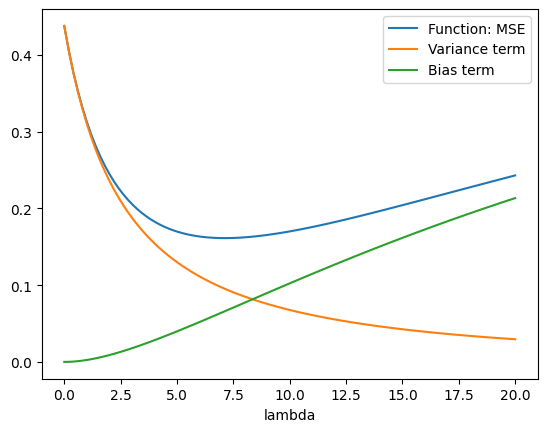

In [ ]:
# Define the independent variable
x = np.linspace(0, 20, 100)  # Creates an array of 100 points between 0 and 10


# Calculate the dependent variable
fMSE = np.vectorize(calculateMSEGivenLambda)
yMSE = fMSE(x)

yVar = [calculateVarianceGivenLambda(l) for l in x]
yVar_traces = [np.trace(matrix) for matrix in yVar]

yBias = [calculateBiasGivenLambda(l) for l in x]
yBias_norm_sq = [np.linalg.norm(matrix) ** 2 for matrix in yBias]
#print(yVar)
#print(yBias)
fig, axes = plt.subplots(1, 1)

# Plot the graph
axes.plot(x, yMSE, label='Function: MSE')
axes.set_xlabel('lambda')
#plt.ylabel('MSE of Ridge Regression')
#plt.title('Graph of a Function')
#plt.legend()
#plt.grid(True)
#plt.show()

axes.plot(x, yVar_traces, label='Variance term')
axes.plot(x, yBias_norm_sq, label='Bias term')

#plt.show()
#axes.plot(x, , label='Bias term')
plt.legend()

In [ ]:
tmp = np.array(yBias)

In [ ]:
tmp.shape

(100, 3, 1)

In [ ]:
yVar_traces

[0.43760361363488864,
 0.42082523525577864,
 0.405143855795998,
 0.39045952073920265,
 0.37668373605844785,
 0.36373790598284766,
 0.3515520152303982,
 0.3400635128126177,
 0.32921636281425737,
 0.3189602341017599,
 0.30924980611385144,
 0.30004417203694933,
 0.2913063239958397,
 0.2830027075718752,
 0.2751028351321131,
 0.26757894921839953,
 0.2604057286872433,
 0.2535600314736005,
 0.24702066882492874,
 0.24076820665604565,
 0.23478479034222602,
 0.22905398982296654,
 0.22356066235225425,
 0.21829083061939378,
 0.21323157429067102,
 0.2083709332971091,
 0.2036978214260277,
 0.19920194897117954,
 0.19487375336375806,
 0.19070433684935695,
 0.18668541039797204,
 0.1828092431386638,
 0.17906861670025154,
 0.1754567839166733,
 0.17196743142229248,
 0.16859464572005944,
 0.16533288235536908,
 0.1621769378718067,
 0.15912192426269395,
 0.15616324566522916,
 0.1532965770727333,
 0.15051784486564432,
 0.1478232089839328,
 0.14520904658295902,
 0.14267193703180986,
 0.14020864812815342,
 0.13

In [ ]:
popBetas.shape

(3, 1)